# Homework 2 DSD - Abhinav Pottabathula

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import sklearn.svm as svm
%matplotlib inline

In [55]:
train = pd.read_csv('training.csv')
train_x = train.drop(train.columns[[3]], axis=1)
train_y = train.drop(train.columns[[0, 1, 2]], axis=1)

tst = pd.read_csv('test.csv')
tst_x = tst.drop(tst.columns[[3]], axis=1)
tst_y = tst.drop(tst.columns[[0, 1, 2]], axis=1)

In [56]:
train_grid, tst_grid = np.ndarray(shape=(5,4)), np.ndarray(shape=(5,4))
C = [0.0001, 0.001, 0.01, 0.1, 1]
d = [1, 2, 3, 5]

for c_pos in range(len(C)):
    for d_pos in range(len(d)):
        model = svm.SVC(C=C[c_pos], kernel='poly', degree=d[d_pos])
        model.fit(train_x, train_y)
        train_grid[c_pos][d_pos] = 1 - model.score(train_x, train_y)
        tst_grid[c_pos][d_pos] = 1 - model.score(tst_x, tst_y)

/Users/apottaba/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
print(train_grid)
print(tst_grid)

[[ 0.08908909  0.08908909  0.05105105  0.01801802]
 [ 0.08908909  0.08908909  0.02102102  0.01501502]
 [ 0.08808809  0.08908909  0.01801802  0.01701702]
 [ 0.03803804  0.08908909  0.01801802  0.01601602]
 [ 0.03403403  0.08908909  0.01701702  0.01601602]]
[[ 0.44148049  0.44148049  0.12404135  0.09769923]
 [ 0.3717906   0.44148049  0.07835945  0.10003334]
 [ 0.18772924  0.44148049  0.0606869   0.10336779]
 [ 0.22074025  0.44148049  0.05635212  0.10103368]
 [ 0.23141047  0.44148049  0.05735245  0.10003334]]


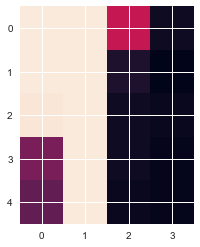

In [80]:
plt.imshow(train_grid)

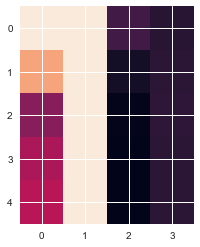

In [81]:
plt.imshow(tst_grid)

On what basis would you decide that a hyperparameter setting is optimal? Which setting of (C, d) gave the optimal results?

I would decide a hyperparameter setting is optimal if it gives me a smaller error for both the training data and the testing data, and does not overfit to the training data. A very small error would mean overfitting to the training data. (.1, 3) gave the optimal results. The lowest test error was 0.05635212, and it had a training error of 0.01801802, so it had a good balance.

You’ll notice that between C and d, one factor mattered far more than the other. What can you conclude about the structure of the datasets and how they were generated?

d is more important than C.

As C increases the model will classify training data more accurately with smaller-margin hyperplanes. Thus the optimal value of C is when it is in the middle of the range [0.0001, 0.001, 0.01, 0.1,1]. Small hyperplanes are important, but when they become too small it leads to overfitting. 

d has a strong impact on the error, because the data best fits a certain kernel type and degree. Out of all the polynomial degrees we were asked to try, the best was d=3. 

In conclusion, I believe the best combination of hyperparameters matches with the hypothesis that the data was generated with some noise because the C has to be optimized in terms of its sensitivity to noise and when creating the hyper-planes.

With as much granularity as possible, which hyperparameter settings are underfitting and which are overfitting? What allows you to make this claim?

The hyperparameters that are overfitting is when both C and d are really high (C=1 and/or d=5). Both their effect on the training data and the testing error is usually higher, which is characteristic of overfitting. This is also intuitive because as C increases, the classifier becomes more sensitive to noise and as d increases the kernel will become increasingly unique when drawing the boundary for the training data. With this increase, the model will strongly match the training data, but not so much the testing data.

In [79]:
from sklearn.cross_validation import KFold

g_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
val_error = []

train_x_np = np.array(train_x)
train_y_np = np.array(train_y)

for gamma_i in range(len(g_vals)):
    model = svm.SVC(C=1, kernel='rbf', gamma=g_vals[gamma_i])
    kfold = KFold(999, n_folds=7)
    total_error = 0
    
    for train_i, test_i in kfold:
        tr_x, tr_y = train_x_np[train_i], train_y_np[train_i]
        ts_x, ts_y = train_x_np[test_i], train_y_np[test_i]
        model.fit(tr_x, tr_y)
        total_error += 1 - model.score(ts_x, ts_y)
    
    val_error.append(total_error/7)
    
df = pd.DataFrame(data = {'Gamma':g_vals, 'Validation Error':val_error})
df 

/Users/apottaba/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Gamma,Validation Error
0,0.001,0.089122
1,0.010,0.046038
2,0.100,0.034036
3,1.000,0.045039
4,10.000,0.086118
5,100.000,0.089122
6,1000.000,0.089122
